# Auction - Task 2 

## Assumptions
We assume that this is a fair and reasonable auction. These assumptions simply mean that the auction operates as you would expect.

# Q1) First Price Auction (FPA)
In this auction, each buyer makes one bid ("offer") to the seller. The seller sells the item to the highest bidder for that amount. 

Example of an ad auction:
<table>
<tr>
<th>Advertiser</th>
<th>Bid</th>
<th>Ad shown?</th>
<th>Price paid</th>
</tr>
<tr>
<td>Alice</td>
<td>\$5</td>
<td>Yes</td>
<td>\$5</td>
</tr>
<tr>
<td>Bob</td>
<td>\$3</td>
<td>No</td>
<td>\$0</td>
</tr>
<tr>
<td>Charlie</td>
<td>\$2</td>
<td>No</td>
<td>\$0</td>
</tr>
</table>
In this example, the seller revenue is \$5.

Suppose that we know that all buyers draw their values either uniformly at random from the $(0,1)$ interval, or from an exponential distribution with a certain parameter $\lambda$. Given that you are person $i$, valuing the item at $x_i$, how much should you bid? **Suppose that everyone else is extremely risk averse, meaning that their function is $\beta_j(x_j) = x_j, \forall j \neq i$.**

Try to maximize your profit (or expected utility, as referred in **task1**), using the bidding function you derived in **task1**!

### Auction Simulator
We will begin by building a simulator for our auctions.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
def simulate_fpa(num_players, beta_fn, distribution, num_trials=1000):
    """
    num_players (int): The number of bidders in the auction.
    beta_fn (function): The bidding function (takes in as input the valuation
        of a bidder and returns how much the bidder bids).
    distribution (str): The distribution from which the valuations are drawn.
        This can be either "uniform" or "exponential". See Q1(a) and Q1(b).
    num_trials (int): The number of trials for which the simulation will run.

    Returns: profit_timeseries (np.ndarray) from your perspective as a player
        Entry `i` of this array will contain the total gain of utility of the
        bidder after `i - 1` trials have elapsed (recall that in Python, arrays
        are zero-indexed).
        This will be plotted in Q1(a) and Q1(b).
    """
        
    # Your beautiful simulation code goes here
    np.random.seed(10)
    profit_timeseries = np.zeros(num_trials)
    trial = 0
    #draw valuation 
    while trial<num_trials:
        #draw valuations(the first one is us)
        if distribution == 'uniform':
            valuations=np.random.rand(num_players)
        elif distribution == 'exponential':
            valuations=np.random.exponential(0.5,num_players) #parameter should be 1/lambda
        #get bid
        my_bid = beta_fn(valuations[0])
        if my_bid > np.max(valuations[1:]):
            utility = valuations[0]-my_bid
            if trial == 0:
                profit_timeseries[trial] = utility
            else:
                profit_timeseries[trial] = profit_timeseries[trial-1] + utility
        else: 
            profit_timeseries[trial]=profit_timeseries[trial-1]
        trial+=1
    return profit_timeseries

### Q1 (a) FPA Uniform
Now, assume that everyone (including you) draws their values uniformly at random from the $(0,1)$ interval. Run a simulation for 1000 rounds with two buyers, and your optimized bidding function. Plot your cumulative profit as it evolves over time. How much can you earn on average? How do your bidding function, cumulative profit, and expected profit change if we have $n-1$ other bidders (plot with $n = 10$  (9 other bidders))? Explain the differences between these graphs.

Note: You should first mathematically derive the expected total profit over all of the trials, and then empirically verify that your answer is correct. **The optimal cumulative profit of 1000 rounds can reach about 81 for n=2 and about 2.5 for n=10. Please get the optimal solution as high as possible for full socre.**

The cumulative profit with two bidders after 1000 rounds is 88.40940973404719
On average the profit per round is 0.0881118612736875


<function matplotlib.pyplot.show(*args, **kw)>

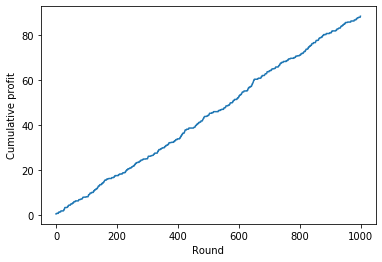

In [18]:
# design your bidding function, plot profit over 1000 rounds, and superimpose expected profit as another line
# for n = 2 (1 other bidder)

def beta(valuation):
    #Define your bidding function for n = 2 (1 other bidder) here
    bid = 0.5*valuation
    return bid
cum_profit1=simulate_fpa(2, beta, 'uniform', num_trials=1000)
print('The cumulative profit with two bidders after 1000 rounds is {}'.format(cum_profit1[-1]))
print('On average the profit per round is {}'.format(np.mean(np.diff(cum_profit1))))
plt.plot(cum_profit1)
plt.xlabel('Round')
plt.ylabel('Cumulative profit')
plt.show
    

The cumulative profit with two bidders after 1000 rounds is 2.6807940300010613
On average the profit per round is 0.00268347750750857


<function matplotlib.pyplot.show(*args, **kw)>

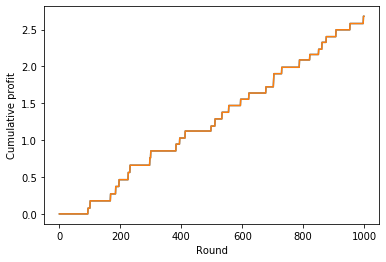

In [19]:
# design your bidding function, plot profit over 1000 rounds, and superimpose expected profit as another line
# for n = 10 (9 other bidders)

def beta2(valuation):
    #Define your bidding function for n = 10 (9 other bidders) here
    bid = 9/10*valuation
    return bid
cum_profit2=simulate_fpa(10, beta2, 'uniform', num_trials=1000)
print('The cumulative profit with two bidders after 1000 rounds is {}'.format(cum_profit2[-1]))
print('On average the profit per round is {}'.format(np.mean(np.diff(cum_profit2))))
plt.plot(cum_profit2)
plt.xlabel('Round')
plt.ylabel('Cumulative profit')
plt.plot(cum_profit2)
plt.show

In [6]:
# explanation for difference between graphs

### Q1 (b) FPA Exponential
Now assume that everyone (including you) draws their values from the exponential distribution with parameter $\lambda = 2$. **Assuming everyone else is still bidding their valuation**, how good of a bidding function can you empirically create for bidding against 9 other people ($n = 10$), who all bid their valuations? Note that it is not necessary to find a closed-form solution. Just play around with different bidding functions and try to find the best one you can! You should explain why you choose your final bidding function here.

In order to receive the full score, we are expecting the total profit for 1000 trials with 9 other people and the exponential distribution with $\lambda = 2$ to be above 25.

**The optimal cumulative profit of 1000 rounds can reach about 24. Please get the optimal solution as high as possible for full socre.**

The cumulative profit with two bidders after 1000 rounds is 17.705018412934837
On average the profit per round is 0.017722741154088926


<function matplotlib.pyplot.show(*args, **kw)>

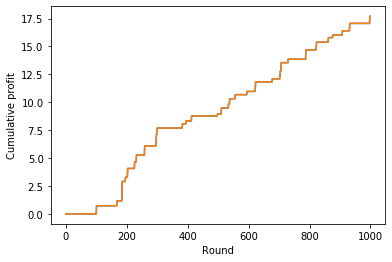

In [112]:
# design your bidding function, plot profit over 1000 rounds, and superimpose expected profit as another line
import math
def beta3(your_valuation): 
    #Define your bidding function for n = 10 (9 other bidders) here
    #everyone draws from the exponential distribution with lambda = 2
    bid=your_valuation*0.7
    return bid
cum_profit3=simulate_fpa(10, beta3, 'exponential', num_trials=1000)
print('The cumulative profit with two bidders after 1000 rounds is {}'.format(cum_profit3[-1]))
print('On average the profit per round is {}'.format(np.mean(np.diff(cum_profit3))))
plt.plot(cum_profit3)
plt.xlabel('Round')
plt.ylabel('Cumulative profit')
plt.plot(cum_profit3)
plt.show
    

# Q2) Second Price Auction (SPA)
In this auction, each buyer again makes one secret bid. The bidder with the highest bid wins, but they only pay the second highest value.

Here is an example of a second price ad auction. Only one person gets to show the ad:  

<table>
<tr>
<th>Advertiser</th>
<th>Bid</th>
<th>Ad shown?</th>
<th>Price paid</th>
</tr>
<tr>
<td>Alice</td>
<td>\$5</td>
<td>Yes</td>
<td>\$3</td>
</tr>
<tr>
<td>Bob</td>
<td>\$3</td>
<td>No</td>
<td>\$0</td>
</tr>
<tr>
<td>Charlie</td>
<td>\$2</td>
<td>No</td>
<td>\$0</td>
</tr>
</table>
In this example, the seller revenue is \$3.

Operating under the same assumptions as in the first price option case, we assume all buyers draw their values uniformly at random from the $(0,1)$ interval. Given that you are person $i$, valuing the item at $x_i$, how much should you bid? **Suppose that everyone else is extremely risk averse, meaning that their function is $\beta_j(x_j) = x_j, \forall j \neq i$. In fact this is the optimal bidding function in the second price auction.**

Modify your simulator to work for the second-price auction case.

## Q2 (a) SPA Profit
Plot your cumulative profit for two buyers as it evolves over time. How much can you earn on average? How do your bidding function, cumulative profit, and expected profit change if we have $n$ bidders total ($n-1$ other bidders)? Evaluate the latter for $n = 10$ (9 other bidders).

In [2]:
def simulate_spa(num_players, beta_fn, distribution, num_trials=1000):
    """
    num_players (int): The number of bidders in the auction.
    beta_fn (function): The bidding function (takes in as input the valuation
        of a bidder and returns how much the bidder bids).
    distribution (str): The distribution from which the valuations are drawn.
        This can be either "uniform" or "exponential". See Q1(a) and Q1(b).
    num_trials (int): The number of trials for which the simulation will run.

    Returns: profit_timeseries (np.ndarray) from your perspective as a player
        Entry `i` of this array will contain the total gain of utility of the
        bidder after `i - 1` trials have elapsed (recall that in Python, arrays
        are zero-indexed).
    """
    # Modify your simulator for SPA here
    pass

In [ ]:
# design your bidding function, plot profit over 1000 rounds, and superimpose expected profit as another line
# for n = 2 (1 other bidder)
def beta4(valuation):
    #Define your bidding function for n = 2 (1 other bidder)
    pass

In [ ]:
# design your bidding function, plot profit over 1000 rounds, and superimpose expected profit as another line
# for n = 10 (9 other bidders)
def beta5(valuation):
    #Define your bidding function for n = 10 (9 other bidders)
    pass

### Q2 (b) Seller Revenue
Now, let's try and see how things look from the other side. Given that all $n$ buyers draw their values uniformly at random from the $(0,1)$ interval, should the seller choose to hold a first price auction, or a second price auction, given that people use optimal bidding functions described above? Show your answer by modifying your simulator for seller revenue (rather than player revenue as we did before) and plotting the revenue from both auctions.

(You can plot $n = 6$ bidders with $100$ trials.)

In [ ]:
# Modify your simulator for seller revenue
def simulate_seller(num_players, distribution, is_first_price, num_trials=1000):
    """
    num_players (int): The number of bidders in the auction.
    distribution (str): The distribution from which the valuations are drawn.
        This can be either "uniform" or "exponential". See Q1(a) and Q1(b).
    is_first_place (boolean): True for FPA, False for SPA
    num_trials (int): The number of trials for which the simulation will run.

    Returns: profit_timeseries (np.ndarray) from the perspective of a seller
        Entry `i` of this array will contain the total gain of revenue of the
        seller after `i - 1` trials have elapsed (recall that in Python, arrays
        are zero-indexed).
    """
    # Modify your simulator for seller revenue here
    pass

# FPA and SPA revenue plots

In [ ]:
# Should the seller choose to hold a FPA or a SPA? Explain.

# Q3) First Price Auction with a Reserve

In this scenario, you are again operating as the $\textbf{seller}$. You want to maximize your revenue selling $k$ identical items over $a$ auctions, $a\geq k$, and thus set a reserve price for each auction. This means that unless the maximum bid in a given auction is above the reserve price you set, the transaction is not completed, and no money or goods exchange hands. If the highest bid is above the reserve price, then the transaction occurs as per usual, with the winner paying what he bid in exchange for the item.

Here is an example of a first price auction with a reserve of $4:  

<table>
<tr>
<th>Advertiser</th>
<th>Bid</th>
<th>Ad shown?</th>
<th>Price paid</th>
</tr>
<tr>
<td>Alice</td>
<td>\$5</td>
<td>Yes</td>
<td>\$5</td>
</tr>
<tr>
<td>Bob</td>
<td>\$3</td>
<td>No</td>
<td>\$0</td>
</tr>
<tr>
<td>Charlie</td>
<td>\$2</td>
<td>No</td>
<td>\$0</td>
</tr>
</table>
In this example, the seller revenue is \$5.


Whereas, here is an example of that same auction with a reserve of $6:

<table>
<tr>
<th>Advertiser</th>
<th>Bid</th>
<th>Ad shown?</th>
<th>Price paid</th>
</tr>
<tr>
<td>Alice</td>
<td>\$5</td>
<td>No</td>
<td>\$0</td>
</tr>
<tr>
<td>Bob</td>
<td>\$3</td>
<td>No</td>
<td>\$0</td>
</tr>
<tr>
<td>Charlie</td>
<td>\$2</td>
<td>No</td>
<td>\$0</td>
</tr>
</table>
In this example, the seller revenue is \$0.


Using a similar framework to before, we are now going to try to optimize the reserve to maximize the seller's profit.

### Q3 (a) Varying Reserve
Suppose that you have $1$ iPhone that you can try to sell at $100$ different auctions, with one auction occuring each day, where at each auction $n$ bidders bid independently according to a fixed bidding function and a fixed but unknown distribution. If you can change the reserve for each auction, what should your reserve strategy as the seller be?

Below, please write an explanation of your strategy in markdown (no code needed).

**You need give us your reference if you cite some other classical problems/models. Give us your detail derivation for your strategy.**

#### Q3 (a) $\mathcal{Y}\text{our beautiful explanation here}$: